# Group Members: Paul Chon and Rohan Athalye

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

csv_file = "https://raw.githubusercontent.com/csbfx/cs133/main/anime_ratings.csv"
anime = pd.read_csv(csv_file)
anime = anime.drop(columns="Unnamed: 0")
anime

,uid,title,synopsis,genre,aired,episodes,popularity,ranked,score
0,28891,Haikyuu!! Second Season,Following their participation at the Inter-Hig...,"['Comedy', 'Sports', 'Drama', 'School', 'Shoun...","Oct 4, 2015 to Mar 27, 2016",25.0,141,25.0,8.82
1,23273,Shigatsu wa Kimi no Uso,Music accompanies the path of the human metron...,"['Drama', 'Music', 'Romance', 'School', 'Shoun...","Oct 10, 2014 to Mar 20, 2015",22.0,28,24.0,8.83
2,34599,Made in Abyss,The Abyss—a gaping chasm stretching down into ...,"['Sci-Fi', 'Adventure', 'Mystery', 'Drama', 'F...","Jul 7, 2017 to Sep 29, 2017",13.0,98,23.0,8.83
3,5114,Fullmetal Alchemist: Brotherhood,"""In order for something to be obtained, someth...","['Action', 'Military', 'Adventure', 'Comedy', ...","Apr 5, 2009 to Jul 4, 2010",64.0,4,1.0,9.23
4,31758,Kizumonogatari III: Reiketsu-hen,After helping revive the legendary vampire Kis...,"['Action', 'Mystery', 'Supernatural', 'Vampire']","Jan 6, 2017",1.0,502,22.0,8.83
...,...,...,...,...,...,...,...,...,...
19306,32979,Flip Flappers,Cocona is an average middle schooler living wi...,"['Sci-Fi', 'Adventure', 'Comedy', 'Magic']","Oct 6, 2016 to Dec 29, 2016",13.0,843,1070.0,7.73
19307,123,Fushigi Yuugi,"While visiting the National Library, junior-hi...","['Adventure', 'Fantasy', 'Magic', 'Martial Art...","Apr 6, 1995 to Mar 28, 1996",52.0,1292,1071.0,7.73
19308,1281,Gakkou no Kaidan,"Years ago, all of the ghosts in a haunted scho...","['Mystery', 'Horror', 'Supernatural']","Oct 22, 2000 to Mar 25, 2001",19.0,1314,1073.0,7.73
19309,450,InuYasha Movie 2: Kagami no Naka no Mugenjo,Inuyasha and company have finally destroyed Na...,"['Action', 'Adventure', 'Comedy', 'Historical'...","Dec 21, 2002",1.0,1469,1077.0,7.73


In [ ]:
anime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19311 entries, 0 to 19310
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   uid         19311 non-null  int64  
 1   title       19311 non-null  object 
 2   synopsis    18336 non-null  object 
 3   genre       19311 non-null  object 
 4   aired       19311 non-null  object 
 5   episodes    18605 non-null  float64
 6   popularity  19311 non-null  int64  
 7   ranked      16099 non-null  float64
 8   score       18732 non-null  float64
dtypes: float64(3), int64(2), object(4)
memory usage: 1.3+ MB


# Question 1: What are the top 10 highest scoring genres for animes?

---



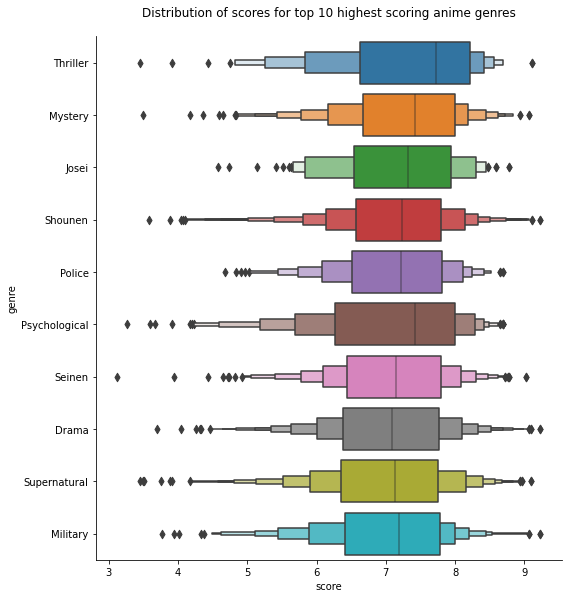

In [ ]:
# The value for genre is a string that looks like a list but is not a list.
# Removes the single quotes and square brackets and converts every value in genre into a list of strings.
new_genre = anime.genre.map(lambda x:x.replace("'","").replace(" ", "").strip('[]').split(','))

# Removes all empty strings.
anime.genre = new_genre.map(lambda genre_list:[genre for genre in genre_list if genre])

# Each element of genre is a list of strings.
# Transforms each element of genre into a row.
anime_long = anime.explode('genre')

highest_genres = anime_long.groupby('genre').score.mean().sort_values(ascending=False).head(10) # Gets the top 10 genres with the highest average scores in descending order.
highest_genres_order = highest_genres.keys().tolist() # Plots the data in a specific order, starting with the highest scoring genre, then the 2nd highest scoring genre, etc.
highest_genres_df = anime_long[anime_long.genre.map(lambda x:x in highest_genres.keys())] # Gets the rows that contain a top 10 highest scoring genre.

# Creates a categorical boxen plot to show the distribution of scores for the top 10 highest scoring genres.
sns.catplot(
    data=highest_genres_df,
    x="score",
    y="genre",
    order=highest_genres_order,
    aspect=1,
    height=8,
    kind='boxen'
)
plt.title("Distribution of scores for top 10 highest scoring anime genres", pad=20);

# Question 2: How does the popularity of animes change between 2009 and 2019?

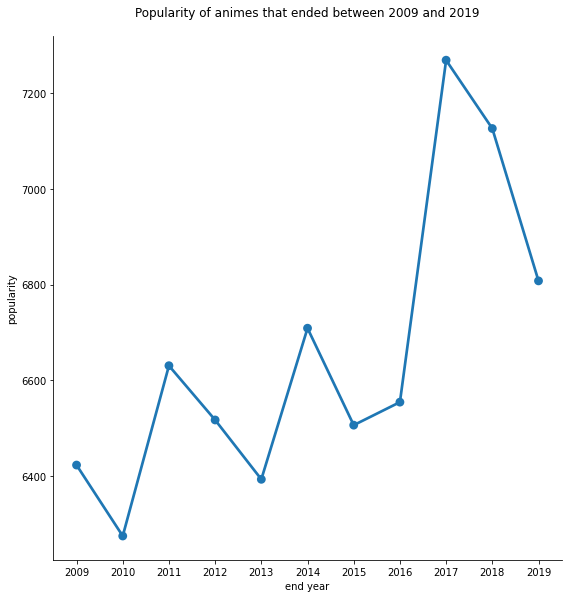

In [ ]:
anime["end year"] = anime.aired.str.split("to").str[-1].str.split(", ").str[-1].str.strip() # Gets the ending year of each anime.
ended_anime = anime[anime["end year"].str.isnumeric()] # Filters the dataframe to only keep animes with a numeric ending year.
ended_anime_2009_2019 = ended_anime[ended_anime["end year"].between("2009", "2019")] # Filters the dataframe to only keep animes that ended between 2009 and 2019.

years = ["2009", "2010", "2011", "2012", "2013", "2014", "2015", "2016", "2017", "2018", "2019"] # Used to plot the data in a specific order.

# Creates a categorical point plot with end year on the x-axis and popularity on the y-axis.
sns.catplot(
    data=ended_anime_2009_2019,
    x="end year",
    y="popularity",
    kind="point",
    ci=None,
    order=years,
    aspect=1,
    height=8
)
plt.title("Popularity of animes that ended between 2009 and 2019", pad=20);

# Question 3: What is the relationship between popularity, rank, and score for animes?

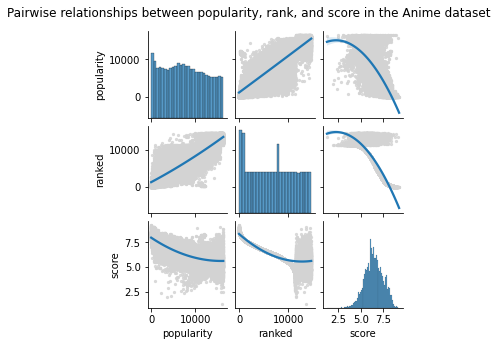

In [ ]:
# Creates a pairplot to show the relationship between popularity, rank, and score.
plot = sns.pairplot(
    data=anime.drop(["uid", "title", "synopsis", "genre", "aired", "episodes"], axis=1),
    kind="reg",
    plot_kws={"scatter_kws":{"color":"lightgrey", "s":5}, "order":2},
    height=1.5)
plot.fig.suptitle("Pairwise relationships between popularity, rank, and score in the Anime dataset", y=1.05);

# Question 4: What are the most common genres for animes?

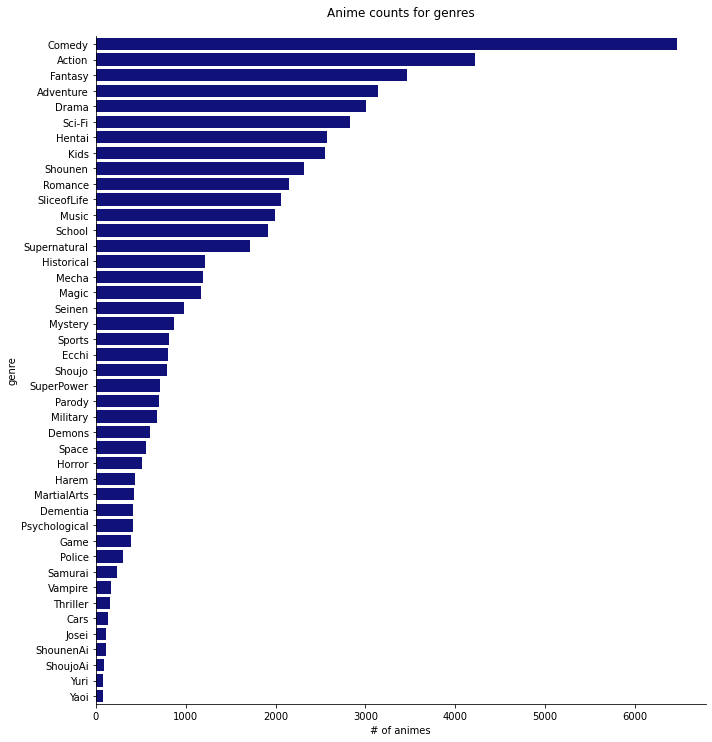

In [ ]:
# Creates a categorical count plot to show the anime counts for each unique genre.
# Note: some animes fall under multiple genres, so the overall counts will be higher.
sns.catplot(
    data=anime_long,
    y="genre",
    kind="count",
    order=anime_long['genre'].value_counts().index,
    color="darkblue",
    aspect=1,
    height=10
).set_axis_labels("# of animes", "genre")
plt.title("Anime counts for genres", pad=20);